In [1]:
# load in images
# test 
import numpy as np
import io
import torch
import torch.nn as nn
import math
from collections import OrderedDict
import torchvision.transforms as transforms
from PIL import Image
import os

In [2]:
def read_img(root, filedir, transform=None):
    # Data loading
    with open(filedir, 'r') as f:
        lines = f.readlines()  
    output = []    
    for line in lines:
        linesplit = line.split('\n')[0].split(' ')
        #print(linesplit)
        addr = linesplit[0]
        target = torch.Tensor([float(linesplit[1])])
        img = Image.open(os.path.join(root, addr)).convert('RGB')

        if transform is not None:
            img = transform(img)
        
        output.append([img, target])

    return output

In [3]:
def main():
   
    #root = 'C:/Users/ÍrisBjörkSnorradótti/Desktop/Documents/ABK/AdvancedProject/NeuralNetwork/data/morph2'
    root = './data/morph2'
    valdir = './data/1/test2morph.txt'
    
    print(root, valdir)
    transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])  
    val_dataset = read_img(root, valdir, transform=transform)

    

if __name__ == '__main__':
    main()
    

./data/morph2 ./data/1/test2morph.txt


In [4]:
root = './data/morph2'
valdir = './data/1/test2morph.txt'




#print(root, valdir)
#transform = transforms.Compose([
#        transforms.Resize(256),
#        transforms.CenterCrop(224),
#        transforms.ToTensor(),
#        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])  
#val_dataset = read_img(root, valdir, transform=transform)




In [36]:
import random

import cv2
from matplotlib import pyplot as plt

#ÍBS: I need this for my kernel not to die
import os
#os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


import albumentations as A

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

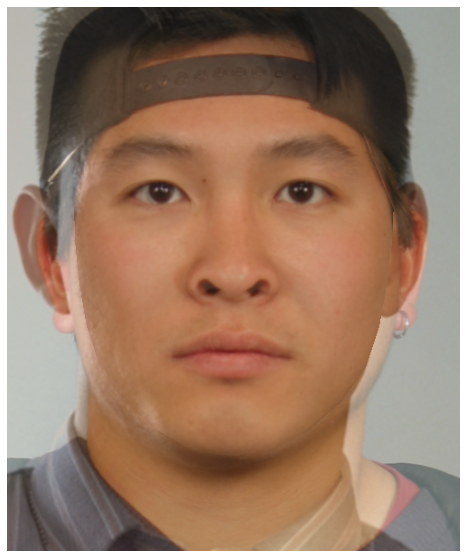

In [155]:
image1 = cv2.imread('./data/morph2/image18.png')
image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
visualize(image)

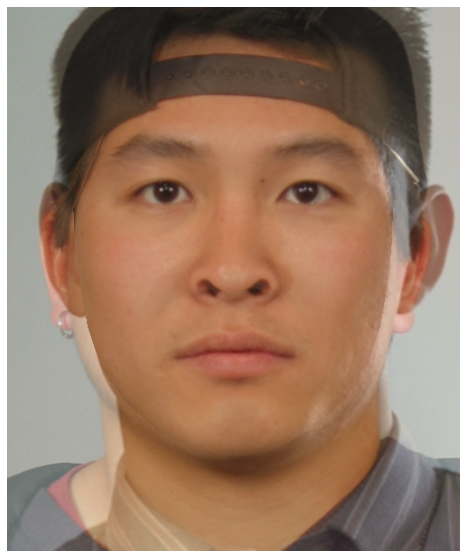

In [156]:
# Flip image horizontally - do this to all photos
transform = A.HorizontalFlip(p=0.5)
random.seed(1)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

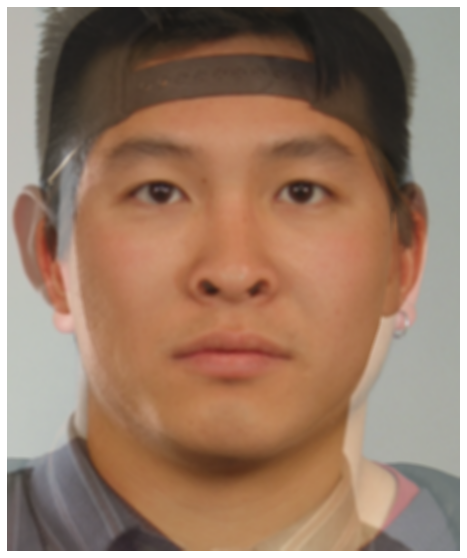

In [189]:
# we could create two versions of this (changing the blur_limit)
transform = A.Blur(blur_limit=5,always_apply=True)

#random.seed(2) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

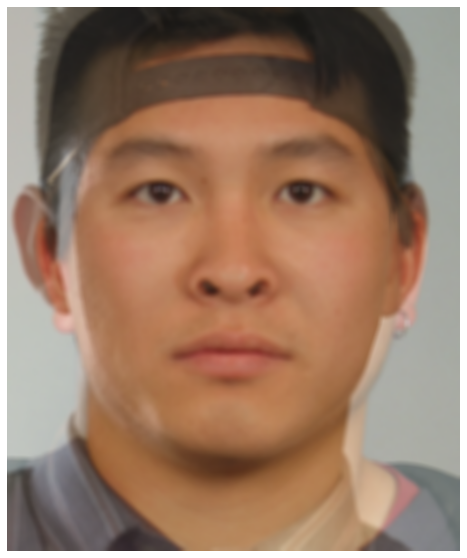

In [192]:
# we could create two versions of this (changing the blur_limit)
transform = A.Blur(blur_limit=12,always_apply=True)

#random.seed(2) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

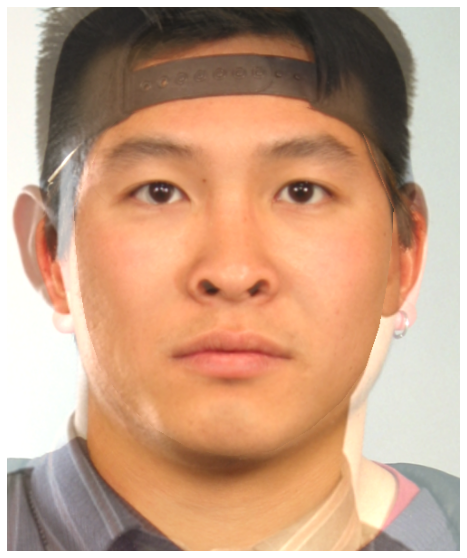

In [160]:
transform = A.RandomContrast(limit=0.5, always_apply=True, p=0.5)

#random.seed(3) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)


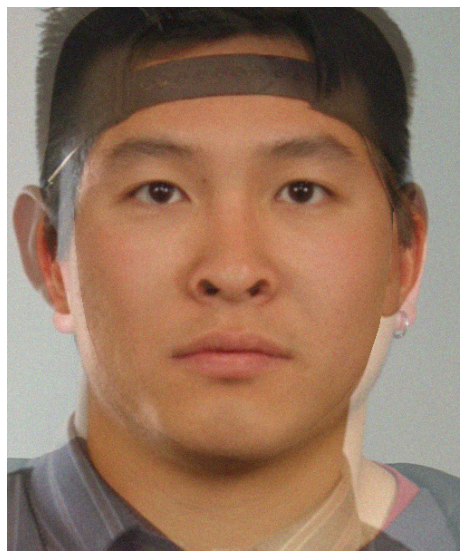

In [161]:
transform = A.GaussNoise(var_limit=(10, 50), always_apply=True, p=0.5)
#random.seed(4) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

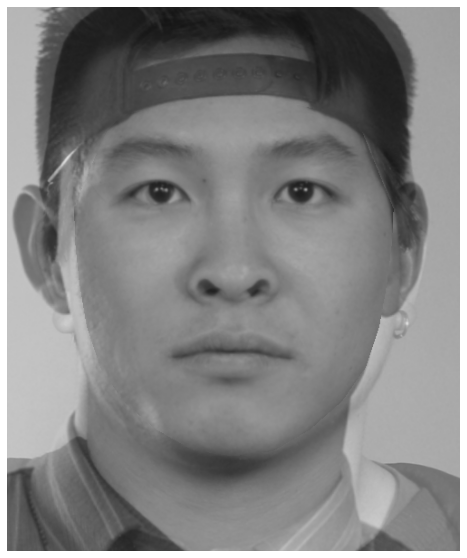

In [162]:
# To grey
transform = A.ToGray(always_apply=True, p=0.9)
#random.seed(5) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

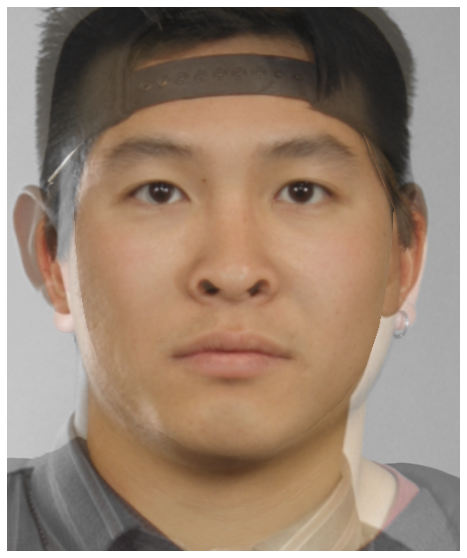

In [176]:
transform = A.HueSaturationValue(hue_shift_limit=15, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=0.9)

random.seed(57) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

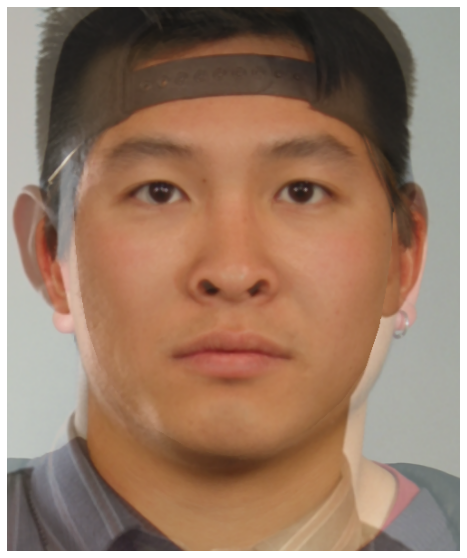

In [177]:
transform = A.MedianBlur(blur_limit=7, always_apply=True, p=0.5)

random.seed(7) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

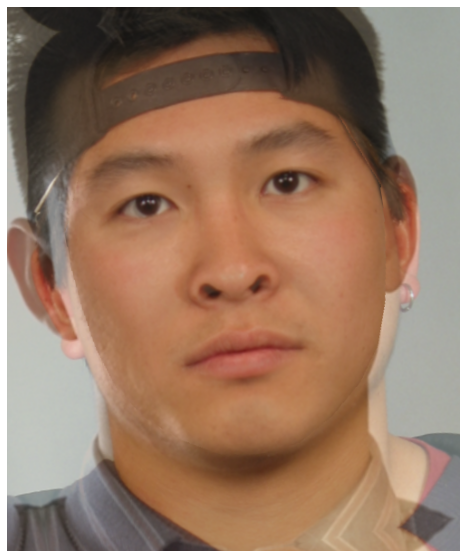

In [184]:
#Tilt both ways for each image
transform = A.Rotate(limit=[0,20], interpolation=1, border_mode=4, always_apply=True, p=1)
random.seed(100)
augmented_image = transform(image=image)['image']
visualize(augmented_image)
# Getum líka skoðað neðsta example hér: https://albumentations.ai/docs/examples/example/

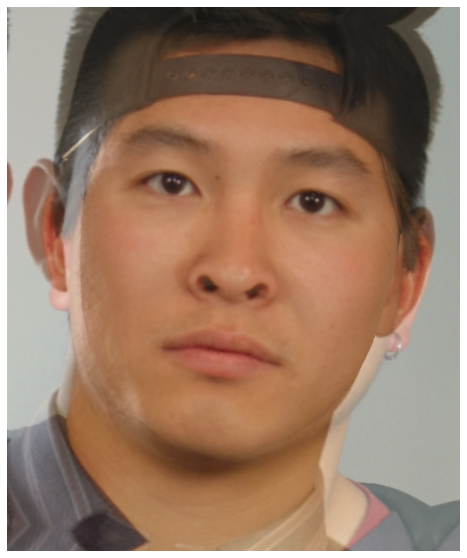

In [183]:
#Tilt both ways for each image
transform = A.Rotate(limit=[-20,0], interpolation=1, border_mode=4, always_apply=True, p=1)
random.seed(102)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


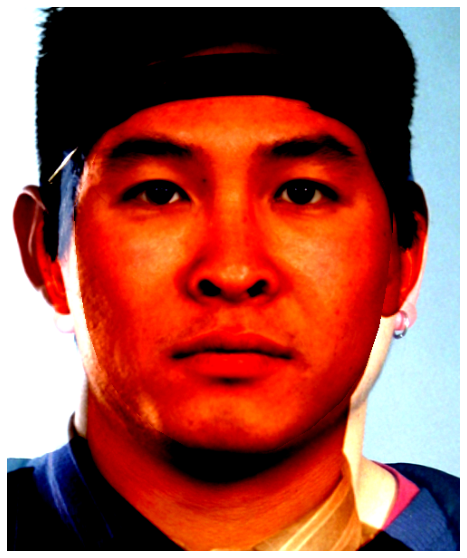

In [185]:
# Not good
transform = A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=True, p=0.5)
#random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)